# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
# data load from local folder (same as the python file)

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
#data.drop(labels=['car_ID'], axis=1, inplace=True)
# shuffle the DataFrame rows 
data = data.sample(frac = 1) 

In [4]:
# checking for the missing values

In [5]:
# there is no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 136 to 7
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# missing data checking and replacing it with mean of the columns concerend code.

#ndata = data.select_dtypes('number')# selecting only numbered columns
#
#for i in ndata.columns[ndata.isnull().any(axis=0)]:     #-Applying Only on variables with NaN values
#    ndata[i].fillna(ndata[i].mean(),inplace=True)       # although there is no NaN value, but generalizing

In [7]:
# label encoding for non-numeric labels using Label Encoder (except car name)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']       = labelencoder.fit_transform(data['fueltype'])
data['aspiration']     = labelencoder.fit_transform(data['aspiration'])
data['carbody']        = labelencoder.fit_transform(data['carbody'])
data['drivewheel']     = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem']     = labelencoder.fit_transform(data['enginelocation'])

data['doornumber']     = data['doornumber'].map({'two':2,'four':4})   # separate encoding 

In [8]:
# verifying for label encoding

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
136,137,3,saab 99gle,1,1,2,2,1,0,99.1,...,121,0,3.54,3.07,9.0,160,5500,19,26,18150.0
62,63,0,mazda rx-4,1,0,4,3,1,0,98.8,...,122,0,3.39,3.39,8.6,84,4800,26,32,10245.0
13,14,0,bmw x3,1,0,4,3,2,0,101.2,...,164,0,3.31,3.19,9.0,121,4250,21,28,21105.0
183,184,2,volkswagen 1131 deluxe sedan,1,0,2,3,1,0,97.3,...,109,0,3.19,3.40,9.0,85,5250,27,34,7975.0
96,97,1,nissan latio,1,0,4,3,1,0,94.5,...,97,0,3.15,3.29,9.4,69,5200,31,37,7499.0


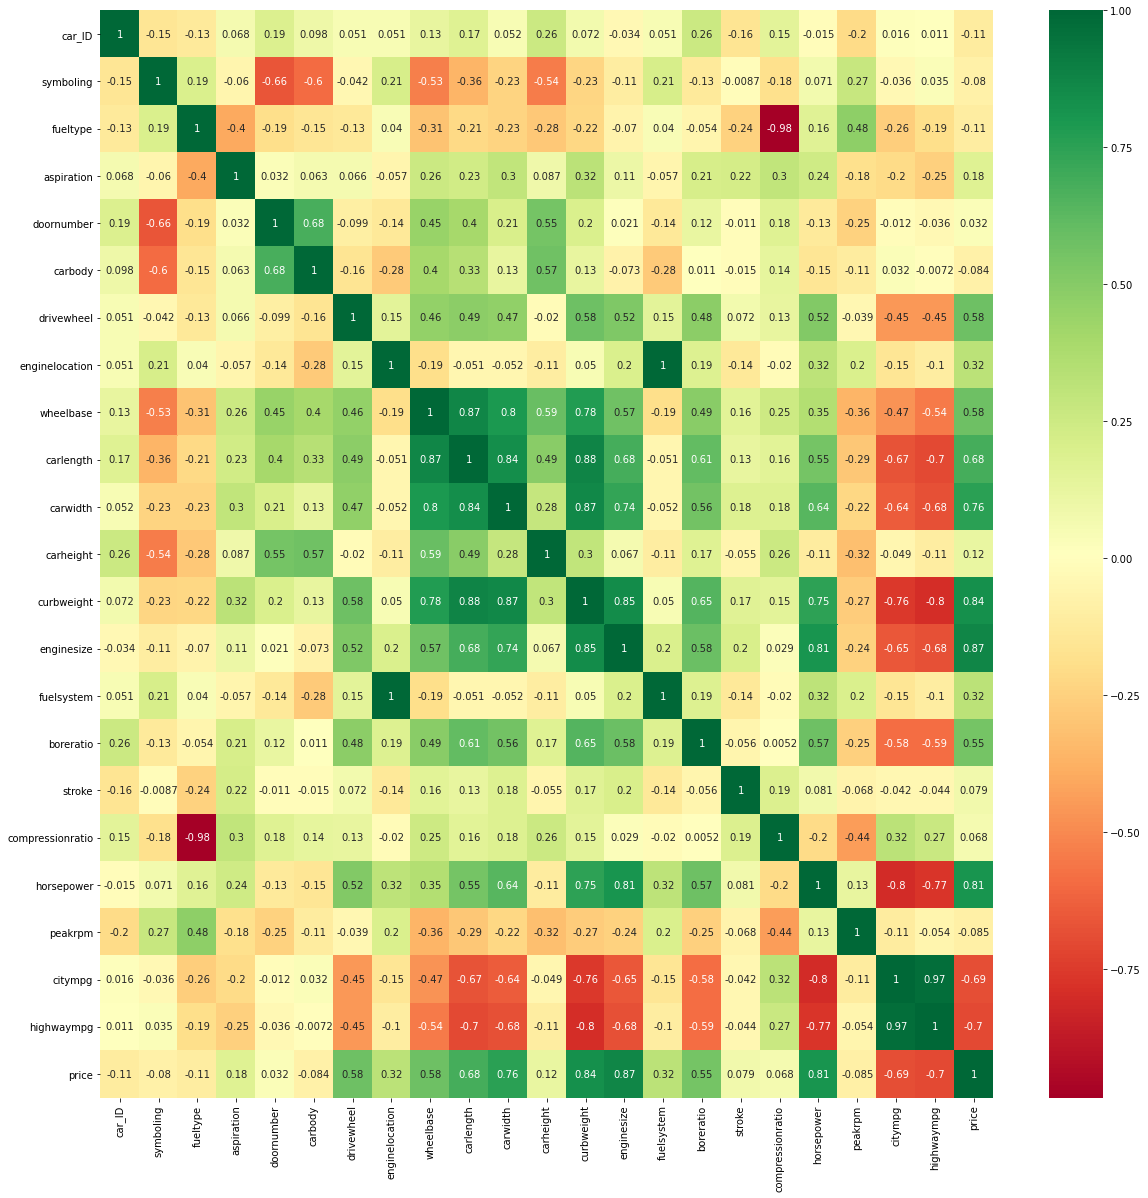

In [9]:
# using corrclation map to single out the variable which really matter for the purpose of prediction
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [10]:
# data which coorelates best with car price is named as 'worthy data'

worthy_data = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation', 'fuelsystem']]

In [11]:
worthy_data.shape

(205, 11)

In [12]:
# x, y data split 
x = (worthy_data.loc[:, worthy_data.columns != 'price'])
y = (worthy_data.loc[:, worthy_data.columns == 'price'])

In [13]:
from sklearn.model_selection import train_test_split

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5  # 50%
ratio_val   = 0.2  # 20%
ratio_test  = 0.3  # 30%

# Produces 30% test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)

# Adjusts val ratio, w.r.t. remaining dataset 
ratio_remaining = 1 - ratio_test   # (70% left).
ratio_val_adjusted = ratio_val / ratio_remaining  # 20% of 70%

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [14]:
print(x_train.shape, x_val.shape, x_test.shape)  # verifying correct ratio distribution

(102, 10) (41, 10) (62, 10)


In [15]:
#Normalizing the data.

#data_qty_cols -= mean

#std = data_qty_cols.std(axis=0)

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_val -= mean
x_val /= std

x_test -= mean
x_test /= std

In [16]:
x_train.shape[1]

10

In [17]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [18]:
model=build_model()

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
4/4 [==============================] - 3s 329ms/step - loss: 252847955.2000 - mae: 13806.9742 - val_loss: 228941248.0000 - val_mae: 12989.4072
Epoch 2/100
4/4 [==============================] - 0s 82ms/step - loss: 207000108.8000 - mae: 12630.1768 - val_loss: 228940080.0000 - val_mae: 12989.3672
Epoch 3/100
4/4 [==============================] - 0s 91ms/step - loss: 228161814.4000 - mae: 12988.2586 - val_loss: 228939344.0000 - val_mae: 12989.3398
Epoch 4/100
4/4 [==============================] - 0s 97ms/step - loss: 208884038.4000 - mae: 12762.9492 - val_loss: 228938720.0000 - val_mae: 12989.3174
Epoch 5/100
4/4 [==============================] - 0s 85ms/step - loss: 228650070.4000 - mae: 13042.8322 - val_loss: 228938096.0000 - val_mae: 12989.2969
Epoch 6/100
4/4 [==============================] - 0s 97ms/step - loss: 209475584.0000 - mae: 12676.6072 - val_loss: 228937536.0000 - val_mae: 12989.2773
Epoch 7/100
4/4 [==============================] - 0s 80ms/step - loss: 224

In [19]:
# evaluating

history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

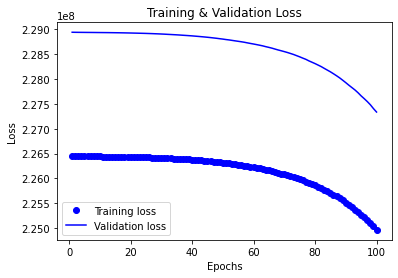

In [20]:
# evaluating validation loss

import matplotlib.pyplot as plt

history_dict=history.history
loss_value = history_dict['loss']
val_loss_value=history_dict['val_loss']
acc=history_dict['mae']   # missing in the book
val_acc=history_dict['val_mae']

epochs = np.arange(1, len(acc)+1)

plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

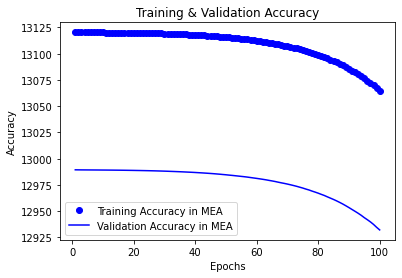

In [21]:
# evaluating validation accuracy

plt.plot(epochs, acc, 'bo', label='Training Accuracy in MEA')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy in MEA')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# pridcting on test values

test_loss_score, test_accuracy_score = model.evaluate(x_test, y_test)

# display test loss
display(test_loss_score)

# display test predic 
display (test_accuracy_score)

2/2 [==============================] - 0s 6ms/step - loss: 266921024.0000 - mae: 13661.8369


266921024.0

13661.8369140625

In [23]:
# I am confused on the results.
# this is really not what it should be
# I hope i shall be graded for steps followed.
# I used correlation mapping just as experiment, so that the number of input variables be reduced.